## Final Project Submission

Please fill out:
* Student name: HILARY SIMIYU
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Diana Mongina
* Blog Post URL:  


# OVERVIEW

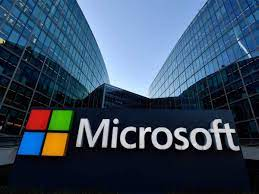




This project will put into application Exploratory Data Analysis to bring about understanding on how Microsoft can create a new Movie Studio and navigate the market to ensure maximum profits on this investment.
Microsoft can use this analysis to determine the best genre to venture into, favourable languages to produce movies in, appropriate runtime and suitable markets to penetrate  into so as to increase their company's revenue.

# Business Understanding
To increase its revenue as a company Microsoft can start a new Movie Studio and use this opportunity to venture into new markets and be able to compete favourably.Doing this will enable Microsoft to reach newer audiences and bring about expansion which in turn increases profits of the company and one of the main goals of starting a company is to provide services that will in turn generate financial rewards to the invetser.


# Objectives

 - What genre is suitable to produce a movie in
 - How much to invest in a movie
 - The relationshipe between a movie language and its popularity


To answer these questions we'll breakdown our analysis as follows:

# 1) DATA UNDERSTANDING

For this analysis we are making use of data collected from the following sites:
 * https://www.imdb.com/
 * https://www.boxofficemojo.com/
 * https://www.rottentomatoes.com/
 * https://www.themoviedb.org/
 * https://www.the-numbers.com/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

#### Using pandas we'll open the _'tmdb.movies.csv.gz'_ csv file from the Zipped Data folder and save it in a data frame called movie_data

In [2]:
movie_data = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)

In [3]:
# Displaying the first 5 rows to ensure our data loaded well

movie_data.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


The movie_data contains data about a movie and shows the language it was first produced in ,the release date and its popularity.

Now we'll investigate 
 * what type of data we have and the corresponding data types of columns
 * discover any missing values in the data set


In [4]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


From the code above we now know that:
 - Our movie_data has 9 columns
 - 26517 enteries in our dataset
 - the columns appear to be all full
 

#### Our second data is stored in a zipped sqlite Database.We'll have to first unzip it then create a connection to the database so we can access it.


In [5]:
# import the zipfile module to help unzip the data
import zipfile

#Extract files from 'im.db.zip' to the current working directory
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall(path='zippedData')
    
# creating a connection to the database
conn = sqlite3.connect('zippedData/im.db')

We'll now read this dataset and extract two tables we are interested in for analysis and assign them to the variables: movie_basics and movie_ratings

In [6]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)

In [7]:
# Displaying the first 5 rows to have an overview of the movie_basics

movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


The movie_basics contains data about a movie,its primary title and original title of the movie, the year it was released along with the movie duration and the genre the movie is in .The movie_id is the unique identifier for each movie 

In [8]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


From the code above  we know that:
  * we have 6 columns
  * there are 146144 entries in the dataset
  * movie_id, primary_title, original_title and genres have Object data types whereas start_year and run_time have integers
  
  ##### missing data in movie_basics
​
From the analysis above the original_title, runtime_minutes and genres columns have missing data

In [9]:
# Displaying the first 5 rows  of movie_ratings to have an overview of it

movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


This dataset shows the average rating a movie got and the number of votes for the rating.The movie_id is the unique identifier for a movie

In [10]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


From the analysis above
 * We have 3 columns
 * The dataset contains 73856 entries
 * there seems to be no missing values

#### Using pandas we'll open our last data, _'tn.movie_budgets.csv.gz'_ csv file from the Zipped Data folder and save it in a data frame called movie_budgets

In [11]:
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [12]:
# Displaying the first 5 rows of movie_budgets

movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


movie_budgets contains data about a movie, its release date the production budget, and what it earned both in the US and globally

In [13]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the code above we get to understand that:
 * the dataset has 6 columns
 * there are 5782 entries 
 * all columns have object data types except for id column
 
 ##### missing data
 From initial observation all columns are full. 
 The data types for some columns may need cleaning too

# 2) DATA CLEANING

After having a clear understanding of the data we are dealing with, we will now put our data cleaning skills to the test and ensure we deal with:
 - missing values
 - duplicate values
 - correct data types
 - correct column names
 
 We will do the data cleaning and also answer the questions this analysis oughts to answer

### Question 1: What Genre to venture into

To answer this question we will make use of our movie_basics and movie_ratings data

First let's merge the two dataframes since they have a common key(movie_id) and assign it to a variable **genres_df**

In [14]:
genres_df = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')

#Display the info about this new joined dataframe
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


We can now check to see if we have missing values in genres_df and get the sum of the total missing values per column

In [15]:
genres_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

The runtime_minutes column has a lot of missing values but for this analysis we won't focus on it a lot, so for now we'll keep them as they are and shift our attention to the missing values from the genres column as our analysis majorly lies there.

Let's get a random sample of some of the entries with missing genres 

In [16]:
missing_genre = genres_df[genres_df['genres'].isna()].sample(10, random_state=1)

missing_genre

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
687,tt10161980,Ituzaingo V3rit4,Ituzaingo V3rit4,2019,93.0,None,4.2,5
73034,tt9321572,The Smiling Lombana,The Smiling Lombana,2018,NaN,None,7.8,67
59844,tt6180770,La vida lliure,La vida lliure,2017,90.0,None,5.9,37
22564,tt2336359,Los días,Los días,2012,80.0,None,6.7,9
50442,tt5009014,Hugh Laurie: Live On The Queen Mary,Hugh Laurie: Live On The Queen Mary,2013,84.0,None,8.5,22
27027,tt2608700,Leapfrog: The Magnificent Museum of Opposite W...,Leapfrog: The Magnificent Museum of Opposite W...,2013,68.0,None,7.3,6
9320,tt1754399,Ramanegra,Ramanegra,2010,NaN,None,7.0,5
73384,tt9569306,Bad Girl Avenue,Bad Girl Avenue,2018,81.0,None,5.0,9
63430,tt6767134,Paris est une fête - Un film en 18 vagues,Paris est une fête - Un film en 18 vagues,2017,95.0,None,6.4,28
67844,tt7638100,What a Beautiful Voice,What a Beautiful Voice,2017,NaN,None,8.9,81


Filling the missing values with another value from the column is risky since we won't be able to know if they are the right genre for it. For now lets drop the missing values to ensure the probability of inputing and changing the genres values is small.

In [17]:
# Drop the rows with missing values 
genres_df.dropna(subset=['genres'], inplace=True)

#Assert they are no missing values in the genre column afterward
assert genres_df['genres'].isna().sum() == 0

In [18]:
genres_df['genres'].value_counts()

Drama                          11612
Documentary                    10313
Comedy                          5613
Horror                          2692
Comedy,Drama                    2617
                               ...  
Biography,History,Music            1
Animation,Biography,Fantasy        1
Action,Crime,Western               1
Animation,Crime,Music              1
Romance,Western                    1
Name: genres, Length: 923, dtype: int64

Now we will be able to answer the first question._What Genre to venture into_


In [19]:
#Find the 10 most popular genre to make a movie in and assign it to variable genres
genres = genres_df['genres'].value_counts().head(10)
genres

Drama                   11612
Documentary             10313
Comedy                   5613
Horror                   2692
Comedy,Drama             2617
Thriller                 1555
Drama,Romance            1510
Comedy,Romance           1236
Comedy,Drama,Romance     1208
Horror,Thriller          1004
Name: genres, dtype: int64

In [21]:
# creating a list to store the names of the most popular genres
popular_genres = [genre for genre in genres.index]
#create a dataframe to store the mean averagerating for the popular_genres
popular_df = genres_df[genres_df['genres'].isin(popular_genres)].groupby('genres')['averagerating'].mean()
#display the popular_df
popular_df

genres
Comedy                  5.777998
Comedy,Drama            6.364119
Comedy,Drama,Romance    6.292467
Comedy,Romance          5.845631
Documentary             7.293794
Drama                   6.494265
Drama,Romance           6.294305
Horror                  4.835475
Horror,Thriller         4.811554
Thriller                5.704244
Name: averagerating, dtype: float64

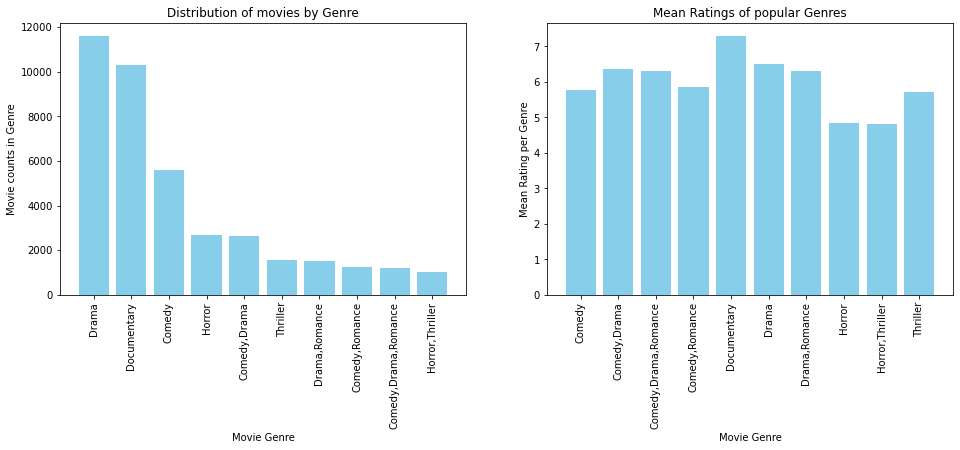

In [23]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Plot data
ax1.bar(genres.index, genres.values, color='skyblue')
ax2.bar(popular_df.index, popular_df.values, color='skyblue')

# Customizing the first subplot appearance
ax1.tick_params(axis="x", labelrotation=90)
ax1.set_xlabel("Movie Genre")
ax1.set_ylabel("Movie counts in Genre")
ax1.set_title("Distribution of movies by Genre")

#Customizing the second subplot appearence
ax2.tick_params(axis="x", labelrotation=90)
ax2.set_xlabel("Movie Genre")
ax2.set_ylabel("Mean Rating per Genre")
ax2.set_title("Mean Ratings of popular Genres");


We have plotted to bar graphs to help understand the genre Microsoft should focus more when creating their studio.
The first bargraph shows the 10 most popular genres where movies lie having Drama as the top one, but this alone is not enough to make a decision on.

The second bargraph now analyses these top 10 genres and their ratings based on some votes from **IMDB** website. It shows that the movies with the highest average rating fall in the genres: 'Documentary' followed by 'Drama' then 'Comedy,Drama'.

### Recomendations

Based on our analysis above we can conclude that the best Genre to invest in more is Drama and Documentary since they have  huge number of films being produced in those genres by other studios and their average ratings are the second and first highest respectively. 

## Question 2: How much to Invest in a Movie Production